In [18]:
import pandas as pd
warnings.filterwarnings("ignore")

df_all = pd.read_csv("df_all.csv")

In [20]:
### MODEL 1/ LINEAR REGRESSION ###

#Defining explanatory and target variables:

X = df_all.drop('Ladder_score', axis=1)
y = df_all['Ladder_score']

#Separating the dataset into a training and a test set, so that the test set contains 20% of the data:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [22]:
# Instantiating a Linear Regression model:

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

#Training the model:
linreg.fit(X_train,y_train)

#Calculation of the coefficient of determination R²:
print('Coefficient of determination of the model on the train set :', linreg.score(X_train, y_train))
print('Coefficient of determination of the model on the test set', linreg.score(X_test, y_test))

# We can see that the R² values are relativley closed between the training and test sets, suggesting that the model is not overfitting 
# and is performing consistently on both datasets. Hence, we can say that the model is generalizing reasonably well.

Coefficient of determination of the model on the train set : 0.7501614556512418
Coefficient of determination of the model on the test set 0.7314526805954663


In [24]:
#Predicting on training and test datasets, so we can look at MAE, MSE and RMSE metrics to assess the model's performance:
y_pred_train = linreg.predict(X_train) 
y_pred_test = linreg.predict(X_test) 

#Calculating MAE, MSE and RMSE metrics:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Metrics on training set:
MAE_train = mean_absolute_error(y_train,y_pred_train)
MSE_train = mean_squared_error(y_train,y_pred_train, squared=True)
RMSE_train = mean_squared_error(y_train,y_pred_train, squared = False)

# Metrics on test set:
MAE_test = mean_absolute_error(y_test,y_pred_test)
MSE_test = mean_squared_error(y_test,y_pred_test, squared=True)
RMSE_test = mean_squared_error(y_test,y_pred_test, squared = False)


print("MAE train =", MAE_train,", MAE test=", MAE_test)
print("MSE train =", MSE_train,", MSE test=", MSE_test)
print("RMSE train =", RMSE_train,", RMSE test=", RMSE_test)

#For each type of metric, the value is relatively close between train and test sets, suggesting that the model does not overfit, and is able to
#generalize to new data.

MAE train = 0.4306503434527207 , MAE test= 0.4507155601629489
MSE train = 0.30904166945491 , MSE test= 0.3315402621952469
RMSE train = 0.5559151639008509 , RMSE test= 0.5757953301262931


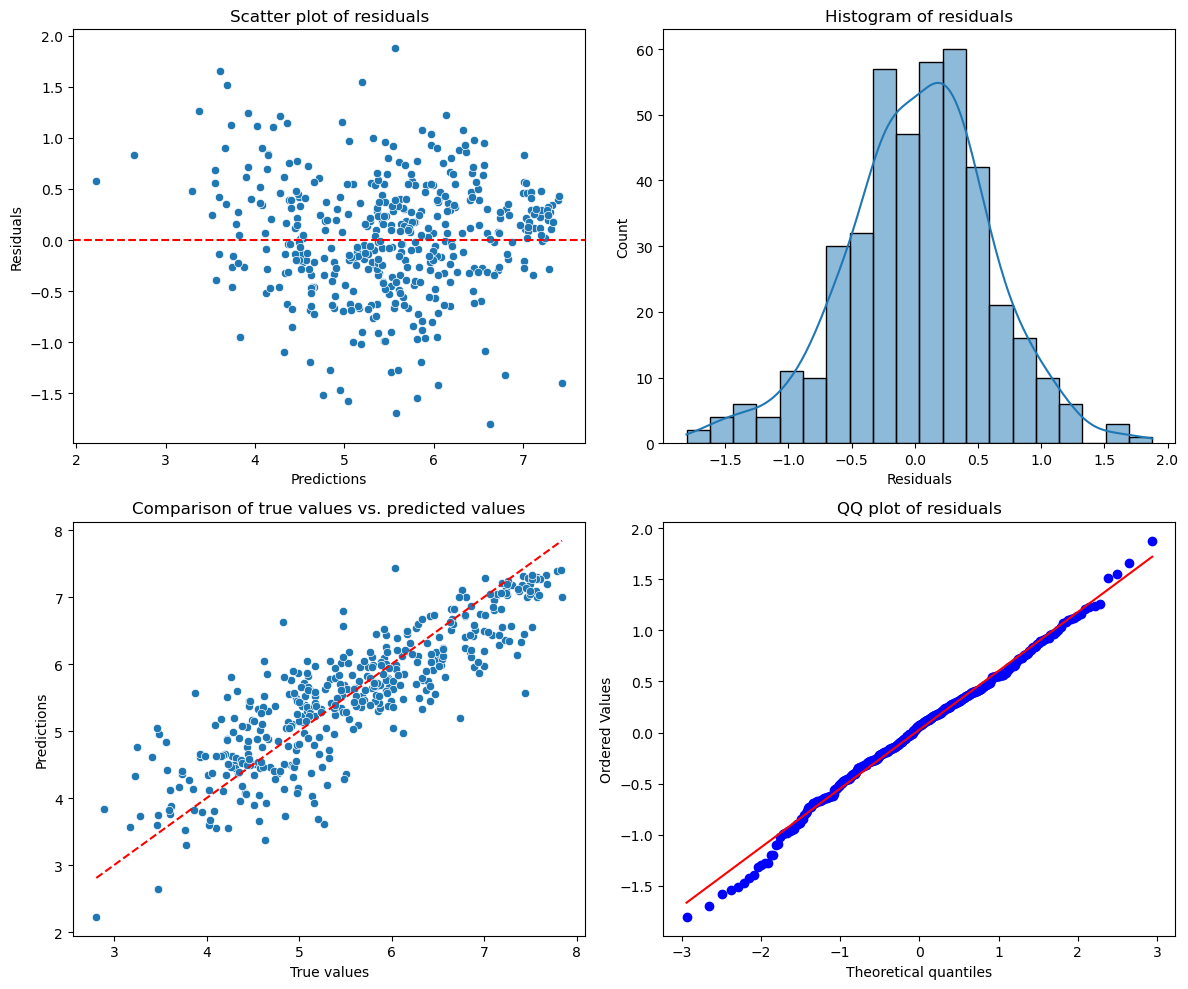

In [26]:
# Residual calculation
import seaborn as sns
from scipy import stats
residuals = y_test - y_pred_test

# Plotting residual
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Scatter plot of residuals
sns.scatterplot(x=y_pred_test, y=residuals, ax=axes[0, 0])
axes[0, 0].set_title("Scatter plot of residuals")
axes[0, 0].set_xlabel("Predictions")
axes[0, 0].set_ylabel("Residuals")
axes[0, 0].axhline(y=0, color='r', linestyle='--')

# Histogram of residuals
sns.histplot(residuals, ax=axes[0, 1], kde=True)
axes[0, 1].set_title("Histogram of residuals")
axes[0, 1].set_xlabel("Residuals")

# Comparing predicted vs true values
sns.scatterplot(x=y_test, y=y_pred_test, ax=axes[1, 0])
axes[1, 0].set_title("Comparison of true values vs. predicted values")
axes[1, 0].set_xlabel("True values")
axes[1, 0].set_ylabel("Predictions")
axes[1, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

# QQ plot of residuals
stats.probplot(residuals, plot=axes[1, 1])
axes[1, 1].set_title("QQ plot of residuals")

plt.tight_layout()
plt.show()

#Residuals vs predicted values: we can see that the residuals are randomly scattered around the horizontal axis (zero line), 
#this indicates that errors are randomly distributed and that the model is appropriately capturing the variables relationship.
#Histogram: we can see the residuals are normally distributed, suggesting that the model is performing well.
#QQ-plot: residuals are lying close to the 45-degree line, consistent with the previous normal distribution observed on the histogram. 
#Comparing true vs predicted values, we can see the true values are relatively closed to the regression line; The prediction is good.
#Overall, we can conclude the model is performant.

In [36]:
### MODEL 2/ DECISION TREE REGRESSOR ###

from sklearn.tree import DecisionTreeRegressor

#Instantiating the model
DTR = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 25, random_state=42)

#Training
DTR.fit(X_train, y_train)

#Calculation of the coefficient of determination R²:
print('Score on train set', DTR.score(X_train, y_train))
print('Score on test set', DTR.score(X_test, y_test))

# We can see that the R² values are relativley closed between the training and test sets, suggesting that the model is not overfitting
#and is performing consistently on both datasets. Hence, we can say that the model is generalizing reasonably well.

Score on train set 0.743853587551619
Score on test set 0.6990047893404463


In [30]:
# MAE, MSE and RMSE for the DecisionTreeRegressor

y_pred_DTR = DTR.predict(X_test)
y_pred_DTR_train = DTR.predict(X_train)

# Training set
mae_decision_tree_train = mean_absolute_error(y_train,
                                              y_pred_DTR_train)
mse_decision_tree_train = mean_squared_error(y_train,
                                             y_pred_DTR_train,
                                             squared=True)
rmse_decision_tree_train = mean_squared_error(y_train,
                                              y_pred_DTR_train,
                                              squared=False)

# Test set
mae_decision_tree_test = mean_absolute_error(y_test, y_pred_DTR)
mse_decision_tree_test = mean_squared_error(y_test, y_pred_DTR)
rmse_decision_tree_test = mean_squared_error(y_test, y_pred_DTR, squared=False)

print("MAE train is:", mae_decision_tree_train, "MAE test is:", mae_decision_tree_test)
print("MSE train is:", mse_decision_tree_train, "MSE test is:", mse_decision_tree_test)
print("RMSE train is:", rmse_decision_tree_train, "RMSE test is:", rmse_decision_tree_test)

MAE train is: 0.4404681660705554 MAE test is: 0.47815349317836636
MSE train is: 0.316844284913186 MSE test is: 0.3715994309042329
RMSE train is: 0.5628892297008231 RMSE test is: 0.6095895593792867


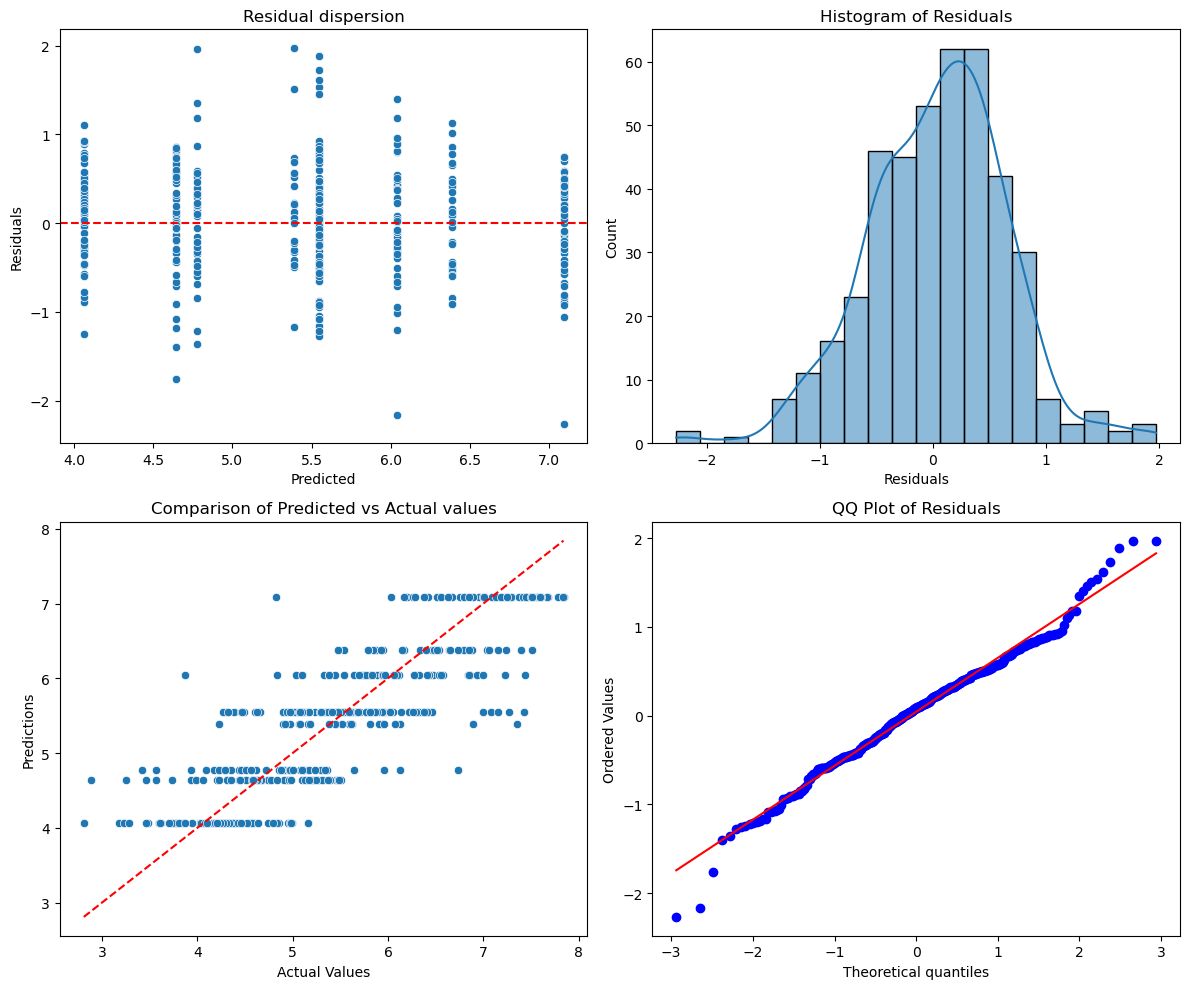

In [32]:
# Calculation of residuals
residuals = y_test - y_pred_DTR

# Creation of a 2x2 subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Predicted vs Residual Values
sns.scatterplot(x=y_pred_DTR, y=residuals, ax=axes[0, 0])
axes[0, 0].set_title("Residual dispersion")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Residuals")
axes[0, 0].axhline(y=0, color='r', linestyle='--')

# Histogram of residuals
sns.histplot(residuals, ax=axes[0, 1], kde=True)
axes[0, 1].set_title("Histogram of Residuals")
axes[0, 1].set_xlabel("Residuals")

# Comparison of Predicted vs Actual values
sns.scatterplot(x=y_test, y=y_pred_DTR, ax=axes[1, 0])
axes[1, 0].set_title("Comparison of Predicted vs Actual values")
axes[1, 0].set_xlabel("Actual Values")
axes[1, 0].set_ylabel("Predictions")
axes[1, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

# QQ plot of residuals
stats.probplot(residuals, plot=axes[1, 1])
axes[1, 1].set_title("QQ Plot of Residuals")

plt.tight_layout()
plt.show()

# Scatterplot: When it comes to the comparison between the predicted and the actual values, we observe gaps in the scatterplot. This implies that the model predictions often fail to capture the true values. 
# Residual dispersion: The dispersion of the residuals is showing gaps in its distribution highlighting the same problem.
# Histogram: The histogram appears to be slightly deviating from the standard bell-shaped curve, with asymmetrical left and right tails and left skewness, 
# suggesting more frequent occurrences of negative residuals than expected in normal distribution.
# QQ-plot: Is showing some deviations as well, with residuals appearing below the bottom and above the top of the reference.

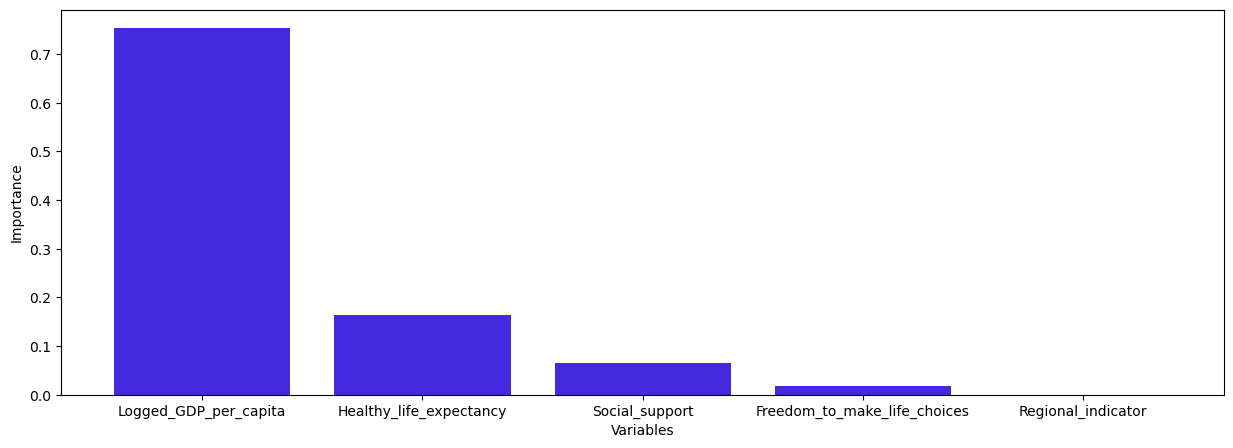

In [34]:
#Analysing the features importance in the Decision Tree model:

features = ['Regional_indicator', 'Country_name', 'year', 'Logged_GDP_per_capita',
            'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices',
            'Generosity', 'Perceptions_of_corruption']

feat_importances = pd.DataFrame({
    "Variables": features,
    "Importance": DTR.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotting the top 5 most important features
top_n = 5
plt.figure(figsize=(15, 5))
plt.bar(feat_importances['Variables'].head(top_n), feat_importances['Importance'].head(top_n), color="#4529de")
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.show()

# The features importance of our decision tree is consistent with the previous heatmap.
# Here too, the logged GDP per capita and healthy life expectancy emerge as the two factors with the greatest influence on the model

In [38]:
### MODEL 3/ RANDOM FOREST REGRESSOR ###

#Instantiating the model
from sklearn.ensemble import RandomForestRegressor 
randf = RandomForestRegressor(max_depth=3, min_samples_leaf=25, random_state=42)

#Training the model:
randf.fit(X_train,y_train)

#Calculation of the coefficient of determination R²:
print('Coefficient of determination of the model on the train set :', randf.score(X_train,y_train))
print('Coefficient of determination of the model on the test set', randf.score(X_test,y_test))

# We can see that the R² values are relativley closed between the training and test sets, suggesting that the model is not overfitting
#and is performing consistently on both datasets. Hence, we can say that the model is generalizing reasonably well.

Coefficient of determination of the model on the train set : 0.7703535166688891
Coefficient of determination of the model on the test set 0.730778686565517


In [40]:
#Predicting on training and test datasets, so we can look at MAE, MSE and RMSE metrics to assess the model's performance:
y_pred_train = randf.predict(X_train) 
y_pred_test = randf.predict(X_test) 

#Calculating MAE, MSE and RMSE metrics:

# Metrics on training set:
MAE_train = mean_absolute_error(y_train,y_pred_train)
MSE_train = mean_squared_error(y_train,y_pred_train, squared=True)
RMSE_train = mean_squared_error(y_train,y_pred_train, squared = False)

# Metrics on test set:
MAE_test = mean_absolute_error(y_test,y_pred_test)
MSE_test = mean_squared_error(y_test,y_pred_test, squared=True)
RMSE_test = mean_squared_error(y_test,y_pred_test, squared = False)


print("MAE train =", MAE_train,", MAE test=", MAE_test)
print("MSE train =", MSE_train,", MSE test=", MSE_test)
print("RMSE train =", RMSE_train,", RMSE test=", RMSE_test)

# This model shows slightly better values than the decision tree and the linear regression models.


MAE train = 0.41377561758099846 , MAE test= 0.4510104789010093
MSE train = 0.28406478583234845 , MSE test= 0.3323723544980221
RMSE train = 0.5329772845369195 , RMSE test= 0.5765174364215033


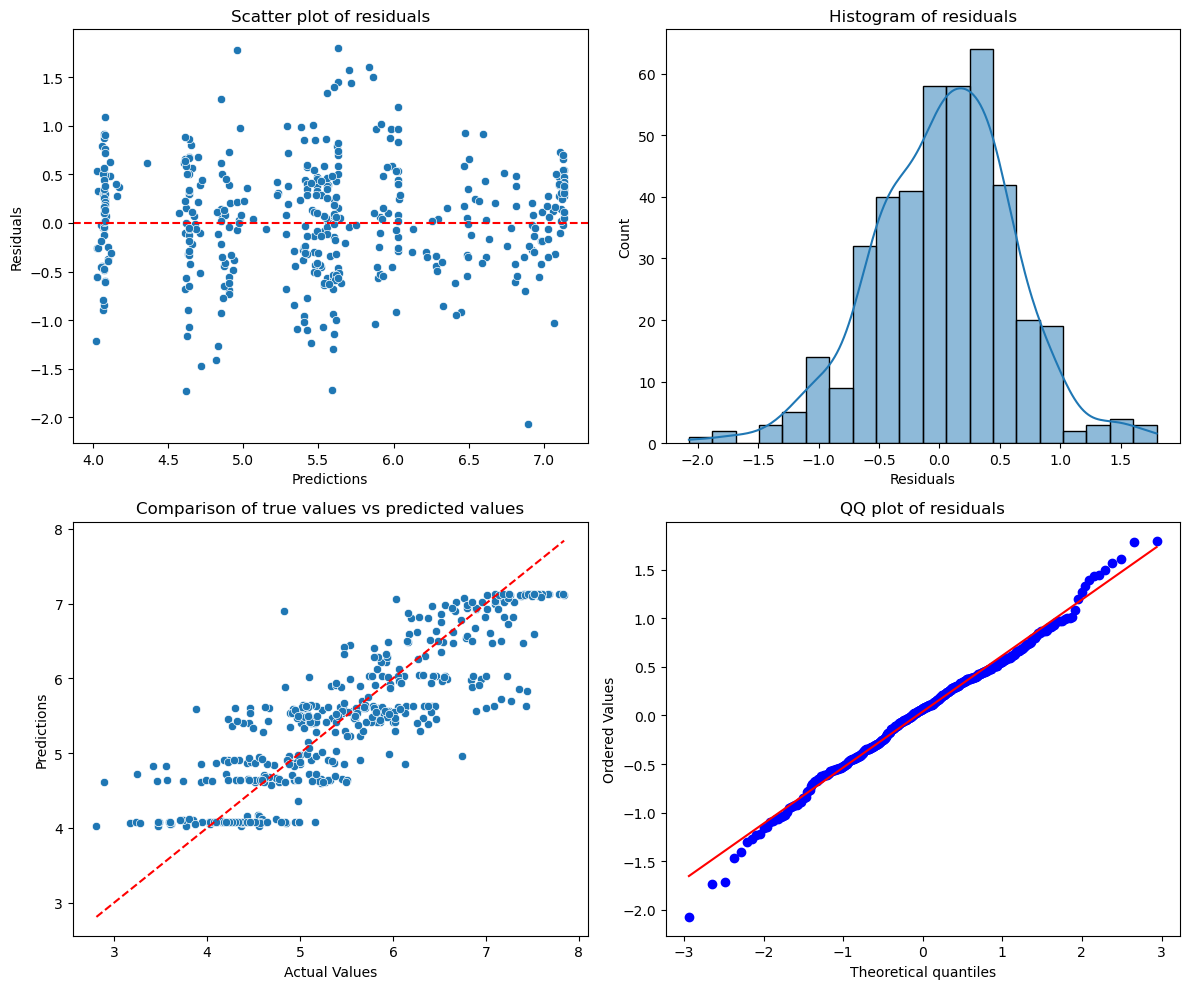

In [42]:
# Residual calculation
residuals = y_test - y_pred_test

# Plotting residual
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Scatter plot of residuals
sns.scatterplot(x=y_pred_test, y=residuals, ax=axes[0, 0])
axes[0, 0].set_title("Scatter plot of residuals")
axes[0, 0].set_xlabel("Predictions")
axes[0, 0].set_ylabel("Residuals")
axes[0, 0].axhline(y=0, color='r', linestyle='--')

# Histogram of residuals
sns.histplot(residuals, ax=axes[0, 1], kde=True)
axes[0, 1].set_title("Histogram of residuals")
axes[0, 1].set_xlabel("Residuals")

# Comparing prediected vs true valuesentre les Valeurs Réelles et Prédites avec ligne diagonale en rouge
sns.scatterplot(x=y_test, y=y_pred_test, ax=axes[1, 0])
axes[1, 0].set_title("Comparison of true values vs predicted values")
axes[1, 0].set_xlabel("Actual Values")
axes[1, 0].set_ylabel("Predictions")
axes[1, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

# QQ plot of residuals
stats.probplot(residuals, plot=axes[1, 1])
axes[1, 1].set_title("QQ plot of residuals")

plt.tight_layout()
plt.show()

#Both she scatterplots of residuals and actual vs predicted values are showing some gaps. Additionally, normal distribution on the histogram 
#is slightly deviated to the left, indicating inaccuracies in our model.
#Residuals in the QQ plot mostly align on the 45-degree line, with the exception of some extreme values 
#behind the reference line in the lower quantile and above the reference line in the upper one.
#Overall this suggests our model is not fully accurate in predicting the target variable.

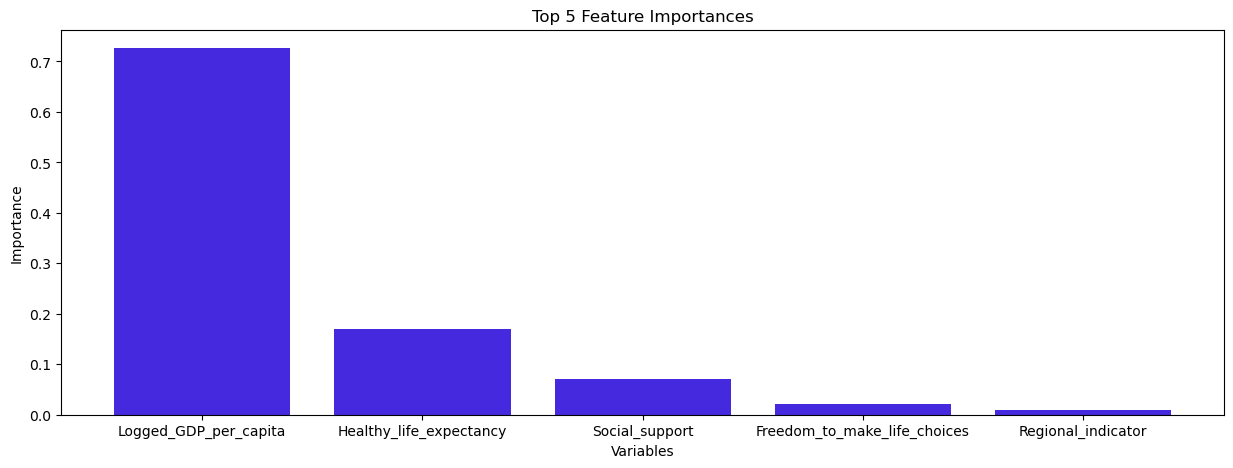

In [44]:
#Looking at the importance of features in this model:

#Creating a variable to store features
features = ['Regional_indicator', 'Country_name', 'year', 'Logged_GDP_per_capita',
            'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices',
            'Generosity', 'Perceptions_of_corruption']

feat_importances = pd.DataFrame({
    "Variables": features,
    "Importance": randf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotting the top 5 most important features
top_n = 5   
plt.figure(figsize=(15, 5))
plt.bar(feat_importances['Variables'].head(top_n), feat_importances['Importance'].head(top_n), color="#4529de")
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importances')
plt.show()

# The Random forest again confirms the feature importance established in the above heatmap and previous models. 
# The logged GDP per capita and healthy life expectancy are consistently the two variables with the greatest influence on the model. 

In [46]:
### MODEL 4/ GRADIENT BOOSTING REGRESSOR ###

# Instantiating a Gradient Boosting model:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=42)

#Training the model:
gb_reg.fit(X_train,y_train)

#Calculation of the coefficient of determination R²:
print('Coefficient of determination of the model on the train set :', gb_reg.score(X_train, y_train))
print('Coefficient of determination of the model on the test set', gb_reg.score(X_test, y_test))

# We can see that the R² value on the test set is a bit behind the train set, however not significantly. 
#Despite this slight drop in performance from training to test, the model seems to generalize reasonably well.

Coefficient of determination of the model on the train set : 0.9005124905701192
Coefficient of determination of the model on the test set 0.8365974481949278


In [48]:
#Predicting on training and test datasets, so we can look at MAE, MSE and RMSE metrics to assess the model's performance:
y_pred_train = gb_reg.predict(X_train) 
y_pred_test = gb_reg.predict(X_test) 

#Calculating MAE, MSE and RMSE metrics:

# Metrics on training set:
MAE_train = mean_absolute_error(y_train,y_pred_train)
MSE_train = mean_squared_error(y_train,y_pred_train, squared=True)
RMSE_train = mean_squared_error(y_train,y_pred_train, squared = False)

# Metrics on test set:
MAE_test = mean_absolute_error(y_test,y_pred_test)
MSE_test = mean_squared_error(y_test,y_pred_test, squared=True)
RMSE_test = mean_squared_error(y_test,y_pred_test, squared = False)


print("MAE train =", MAE_train,", MAE test=", MAE_test)
print("MSE train =", MSE_train,", MSE test=", MSE_test)
print("RMSE train =", RMSE_train,", RMSE test=", RMSE_test)

#For each type of metric, the value is relatively close between train and test sets, suggesting that the model performs quite well.
#There is a slight indication of overfitting, as evidenced by higher values on the test set compared to the training set. 
#However, the differences are not severe, indicating that the model generalizes reasonably well.

MAE train = 0.2717889467013764 , MAE test= 0.33777972922072597
MSE train = 0.12306262063872088 , MSE test= 0.2017317655188312
RMSE train = 0.3508028230198852 , RMSE test= 0.4491455950121644


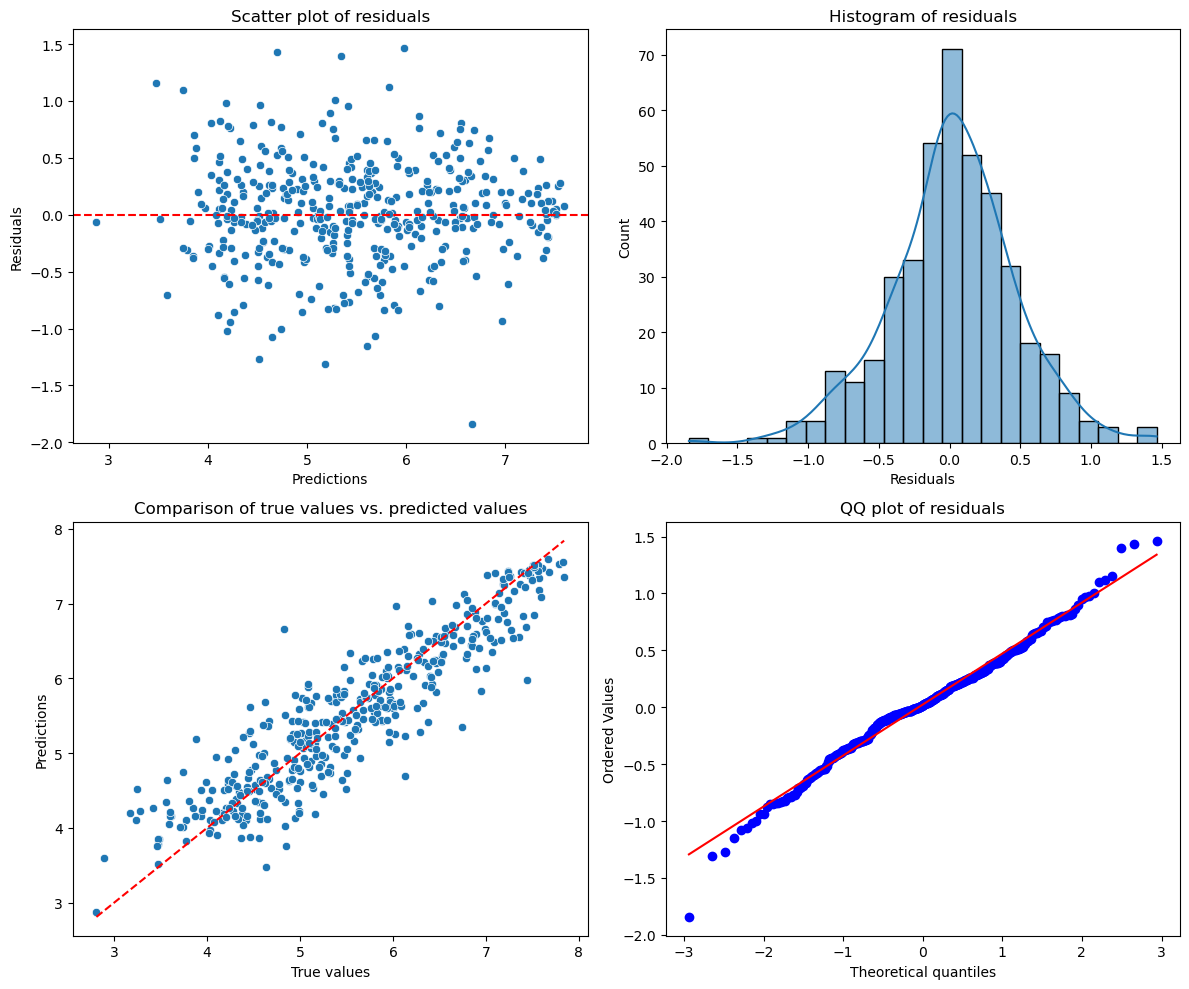

In [50]:
# Residual calculation
residuals = y_test - y_pred_test

# Plotting residual
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Scatter plot of residuals
sns.scatterplot(x=y_pred_test, y=residuals, ax=axes[0, 0])
axes[0, 0].set_title("Scatter plot of residuals")
axes[0, 0].set_xlabel("Predictions")
axes[0, 0].set_ylabel("Residuals")
axes[0, 0].axhline(y=0, color='r', linestyle='--')

# Histogram of residuals
sns.histplot(residuals, ax=axes[0, 1], kde=True)
axes[0, 1].set_title("Histogram of residuals")
axes[0, 1].set_xlabel("Residuals")

# Comparing prediected vs true valuesentre les Valeurs Réelles et Prédites avec ligne diagonale en rouge
sns.scatterplot(x=y_test, y=y_pred_test, ax=axes[1, 0])
axes[1, 0].set_title("Comparison of true values vs. predicted values")
axes[1, 0].set_xlabel("True values")
axes[1, 0].set_ylabel("Predictions")
axes[1, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

# QQ plot of residuals
stats.probplot(residuals, plot=axes[1, 1])
axes[1, 1].set_title("QQ plot of residuals")

plt.tight_layout()
plt.show()

#Consistently with previous graph, residual plots are showing patterns indicating that the model's predictions are reasonably accurate. 
#Typically, errors randomly distributed around the baseline on the scatter plot, normal distribution on the histogram and 
#residuals aligning with the 45-degree line on the QQ plot.

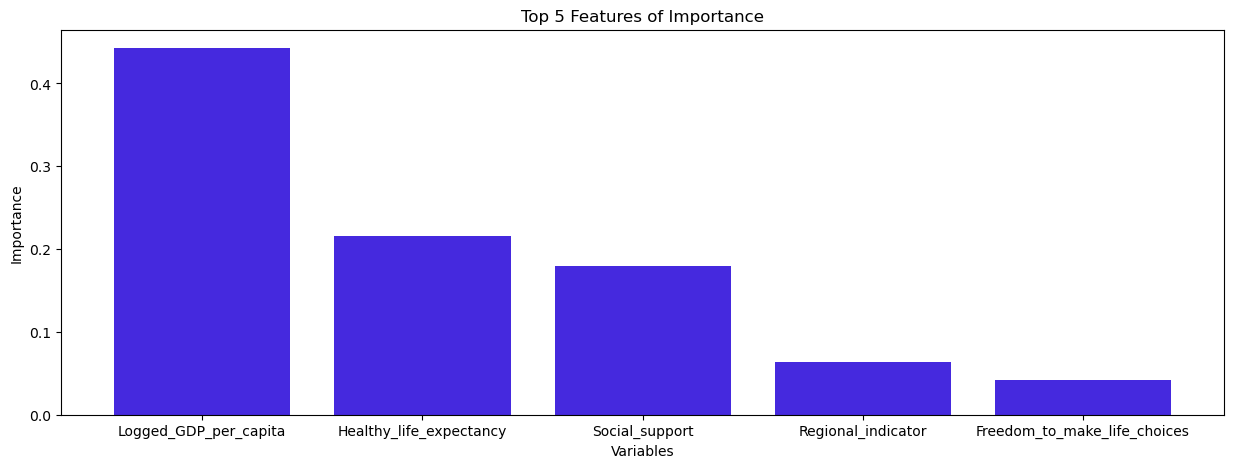

In [52]:
#Looking at the importance of features in this model:

#CreatING a variable to store features
features = ['Regional_indicator', 'Country_name', 'year', 'Logged_GDP_per_capita',
            'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices',
            'Generosity', 'Perceptions_of_corruption']

feat_importances = pd.DataFrame({
    "Variables": features,
    "Importance": gb_reg.feature_importances_
}).sort_values(by='Importance', ascending=False)

#Plotting the top 5 most important features
top_n = 5   
plt.figure(figsize=(15, 5))
plt.bar(feat_importances['Variables'].head(top_n), feat_importances['Importance'].head(top_n), color="#4529de")
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Top 5 Features of Importance')
plt.show()

#Consistently with the previous analysis performed during the prepreocessing steps, we can see that the two most important factors influencing
#life evaluation is the logged GDP per capita and healthy life expectancy, followed by social support, continent and freedom to make life choices.